In [260]:
#Junming Chen


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.cluster.hierarchy import dendrogram, linkage      



%matplotlib inline

In [191]:
#import cleaned data/tweets from pervious project
clean_tweets = pd.read_csv('clean_tweets.csv')
pd.set_option('display.max_colwidth', -1)
clean_tweets.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text,IsitRetweet,hashtag_handle,tophash
0,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv,False,#infosec #Intel #ACM #IEEE,#infosec
1,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,NaN,0,0,@WayneDupreeShow #climatechange is the democrats' attempt to play God,False,@WayneDupreeShow #climatechange,@WayneDupreeShow #climatechange
2,My Info,chrisf91,2424856262,129,822,"San Antonio, TX","im not supersticous, but... i am a little sticious...",Fri Oct 28 09:34:20 EEST 2016,791890827974840322,en,NaN,0,0,"@mlombardifoxtv its ok to admit bill bellichick cusses out his players! Hey @ochocinco this dude dont beleive u, hes all on pats nuts.",False,@mlombardifoxtv @ochocinco,@ochocinco
3,EmmaPeel,Emma__Peel,180304807,2648,4549,emma w/2 underscores,Good deeds and kindness never fail,Fri Oct 28 23:11:29 EEST 2016,792096469994004480,en,NaN,0,0,@advocatehealth We're giving away a L @KrisBryant_23 jersey on social media for Game 3! #FlyTheW #WorldSeries,False,@advocatehealth @KrisBryant_23 #FlyTheW #WorldSeries,@KrisBryant_23 #FlyTheW #WorldSeries
4,Laura,Ciocia,17235735,2517,3602,"London, Ontario, Canada",Steam Pipe Trunk Distribution Venue,Sun Oct 30 02:28:03 EEST 2016,792508326537994240,en,NaN,0,0,"@WritersDigest @NaNoWriMo There's no ""there"" there.",False,@WritersDigest @NaNoWriMo,@NaNoWriMo


In [192]:
#vectorize pd of UserID and Top hashtags and handles, tranform data to matrix array

import sklearn.feature_extraction.text as sk_text

df_hashtag_agg = clean_tweets.groupby('UserID')['tophash'].sum()  
df_ready_for_sklearn = pd.DataFrame({'UserID': df_hashtag_agg.index, 'All_hashtags': df_hashtag_agg.values})

vectorizer = sk_text.TfidfVectorizer(min_df=1, stop_words = 'english')

matrix = vectorizer.fit_transform(df_ready_for_sklearn.All_hashtags)
print(type(matrix))         
tfidf_data = matrix.toarray() 
print(tfidf_data)
#print(tfidf_data.shape)

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00765988 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [193]:
print(vectorizer.get_feature_names())

['0hour1__', '0hour1___', '100ktweets4safety', '100percfedup', '1029now', '10news', '10thamendment', '11thhour', '12', '12018384838', '18major', '1911g_fan', '1chicklette', '1followernodad', '1fubar', '1jaredburrell15', '1seastar1', '1shawnster', '1stclown', '1therealmichael', '1voicematters', '2000shp', '2016', '2016deplorables', '2016opinion', '2016republic', '2017', '20committee', '2351onthelist', '247101', '247sports', '2717productions', '28brenton', '2a', '2alaw', '2b_painfree', '2dammuslim', '2froppish2pet', '2itb_buffalo', '2monthstillxmasand', '2tweetaboutit', '2xshhhh', '318fadra', '333turkman', '38_28_38', '3annier', '3phibotticelli', '48hours', '49ers', '49ersfaithful', '49ersfamily', '4evertruther', '4la_volpe', '4reallyandtruly', '4reunitedstates', '502eire', '50th_president', '572blownhemi', '58isthenew40', '5dragons', '5mumsie', '5odayja', '5tevejs', '60minutes', '6469mjc', '64by4', '670thescore', '6abc', '6ame', '6bird4', '72cricket', '786mayor', '7b00f339f69e48f', '7bo

In [194]:
#import Given Ground Truth data

tweet_cols = ['UserID', 'truth']
supporter = pd.read_table('clinton_trump_user_classes.txt',names=tweet_cols, encoding ="ISO-8859-1")

In [195]:
#Compute Kmeans for the Matrix Array

import sklearn.cluster as sk_cluster

kmeans = sk_cluster.KMeans(n_clusters=2, max_iter=100, n_init=10)

kmeans_labels = kmeans.fit_predict(tfidf_data)

print ('Cluster labels')
print(kmeans_labels)

centroids = kmeans.cluster_centers_
print ('Cluster Centroids')
print(centroids)

error = kmeans.inertia_
print ("The total error of the clustering is: ", error)

Cluster labels
[1 1 1 ... 1 0 1]
Cluster Centroids
[[ 1.53880387e-02  1.96046554e-03  1.41623909e-18 ...  3.04931861e-18
   4.98732999e-18 -4.60785923e-19]
 [ 2.80744695e-03  5.33421441e-04  7.10422730e-05 ...  1.38689643e-04
   3.26052154e-04  1.66134857e-04]]
The total error of the clustering is:  4510.203556143416


In [196]:
#Merging ground truth data to cleaned and grouped data pd

merge_tweets = pd.merge(df_ready_for_sklearn, supporter, on='UserID')
print(merge_tweets.truth.shape)

(4659,)


In [197]:
#Compute Kmeans confusion matrix , precision, recall, and f1 values of groun truth value vs kmeans label

import sklearn.metrics as metrics

kmeansconfusion = metrics.confusion_matrix(merge_tweets.truth.values, kmeans.labels_, labels=[0, 1])   # first row: 0 ; second row: 1
kmeansprecision = metrics.precision_score(merge_tweets.truth.values, kmeans.labels_, average='weighted') 
kmeansrecall = metrics.recall_score(merge_tweets.truth.values, kmeans.labels_, average='weighted')
kmeansf1 = metrics.f1_score(merge_tweets.truth.values, kmeans.labels_, average= 'weighted')
print(kmeansf1)
print(kmeansrecall)
print(kmeansprecision)
print(kmeansconfusion)

0.5585508485032431
0.5855333762610002
0.6899019170765138
[[ 922 1736]
 [ 195 1806]]


In [198]:
#Max-based Agglomerative Clustering
maxag = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 2)   

#complete: The maximum distances
#n_clusters: The number of clusters to find.

max_labels = maxag.fit_predict(tfidf_data)

print ('\nPrinting cluseter assignment:')
max_labels


Printing cluseter assignment:


array([0, 0, 1, ..., 0, 1, 0])

In [199]:
# SSE-based agglomerative hierarchical clustering

sseag = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 2)   

#complete: The maximum distances
#n_clusters: The number of clusters to find.

sse_labels = sseag.fit_predict(tfidf_data)

print ('\nPrinting cluseter assignment:')
sse_labels 


Printing cluseter assignment:


array([1, 1, 1, ..., 1, 1, 1])

In [200]:
#Compute MAX-based agglomerative confusion matrix, precision, recall and f1 value

maxconfusion = metrics.confusion_matrix(merge_tweets.truth.values, max_labels, labels=[0, 1])   # first row: 0 ; second row: 1
maxprecision = metrics.precision_score(merge_tweets.truth.values, max_labels, average='weighted') 
maxrecall = metrics.recall_score(merge_tweets.truth.values, max_labels, average='weighted')
maxf1 = metrics.f1_score(merge_tweets.truth.values, max_labels, average= 'weighted')
print(maxf1)
print(maxrecall)
print(maxprecision)
print(maxconfusion)

0.4692845722979502
0.49323889246619446
0.46607226617582737
[[1825  833]
 [1528  473]]


In [201]:
#Compute SSE-based agglomerative confusion matrix, precision, recall and f1 value
sseconfusion = metrics.confusion_matrix(merge_tweets.truth.values, sse_labels, labels=[0, 1])   # first row: 0 ; second row: 1
sseprecision = metrics.precision_score(merge_tweets.truth.values, sse_labels, average='weighted') 
sserecall = metrics.recall_score(merge_tweets.truth.values, sse_labels, average='weighted')
ssef1 = metrics.f1_score(merge_tweets.truth.values, sse_labels, average= 'weighted')
print(ssef1)
print(sserecall)
print(sseprecision)
print(sseconfusion)

0.5850007479411834
0.6095728697145311
0.7219527467933194
[[ 987 1671]
 [ 148 1853]]


In [202]:
#Sort Centroids from highest value to leaset
asc_order_centroids = kmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.

des_order_centroids = asc_order_centroids[:,::-1] 

In [203]:
#print top 30 Feature with highest TF IDF value for each cluster base of their indice

terms = vectorizer.get_feature_names()
print ("All the terms:")
#print(terms, '\n')

for i in range(2):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :30]:
        print (terms[ind])

    print()  

All the terms:
Cluster: 0
realdonaldtrump
hillaryclinton
foxnews
megynkelly
cnn
newtgingrich
seanhannity
wikileaks
kellyannepolls
fbi
maga
mitchellvii
mike_pence
abc
ingrahamangle
msnbc
cnnpolitics
potus
wdfx2eu7
draintheswamp
donaldjtrumpjr
washingtonpost
loudobbs
thehill
youtube
teamtrump
foxandfriends
trump
cbsnews
nytimes

Cluster: 1
realdonaldtrump
hillaryclinton
cnn
joyannreid
trump
msnbc
kurteichenwald
washingtonpost
wikileaks
jasoninthehouse
megynkelly
fbi
nytimes
thehill
youtube
kellyannepolls
foxnews
mitchellvii
jaketapper
sopandeb
politico
hillary
chrislhayes
seanhannity
cnnpolitics
abc
potus
walshfreedom
newtgingrich
gop



# Task  1.3  (10  pts):Show  the  two respective  word  clouds  of  the  two  centers  (centroids)  by  using  hashtags/handles and their tfidf values.   Hint:  Use function fit_words() that comes with wordcloud

In [317]:
#prepare Trump's cluster word and frequency into a list for wordcloud

terms = vectorizer.get_feature_names()
tf =   vectorizer.idf_
trumpwords=[]
trumptfidf=[]
print ("Cluster:", 0)
for ind in des_order_centroids[0,:]:
    #print (terms[ind])
    #print (ind)
    trumpwords.append(terms[ind])
    #trumptfidf.append(tfidf_data[0,ind])
    #trumptfidf.append(kmeans.cluster_centers_.argsort()[:,::-1])
    trumptfidf.append(tf[ind])
print()    

Cluster: 0



In [310]:
#prepare Clinton's cluster word and frequency into a list for wordcloud

terms = vectorizer.get_feature_names()
#print(terms, '\n')
clintonwords=[]
clintontfidf=[]

print ("Cluster:", 1)
for ind in des_order_centroids[1, :]:
    #print (terms[ind])
    #print (ind)
    clintonwords.append(terms[ind])
    clintontfidf.append(vectorizer.idf_[ind])
print()  

Cluster: 1



In [318]:
# using dict zip method to combine words and their tf idf value 

frequencies  = dict(zip(trumpwords,trumptfidf))

frequencies

{'duranduran': 8.753623546559746,
 'hillaryforva': 7.367329185439855,
 'idiot': 6.674182004879911,
 'isaacdovere': 6.881821369658155,
 'derek_mafs': 8.34815843845158,
 'faenrikstaal': 8.753623546559746,
 'boeufblogginon': 7.837332814685591,
 'anne19brown': 7.837332814685591,
 'boxerbalah': 8.34815843845158,
 'hillarysemail': 4.992423430866184,
 'katrinapierson': 4.773941892657785,
 'carolyng1014': 8.34815843845158,
 'kelloggsus': 8.753623546559746,
 'kevingfox': 8.753623546559746,
 'kattimpf': 5.640108237349372,
 'cathmckenna': 7.144185634125646,
 'hrw': 7.249546149783472,
 'liberalphenom': 7.048875454321321,
 'brynn_jk': 8.34815843845158,
 'irishmed': 8.753623546559746,
 'alivitali': 4.710572278725196,
 'datnofact': 7.837332814685591,
 'historyinpix': 6.881821369658155,
 'johnriverstoo': 5.8632517886635815,
 'fieldoffight': 6.613557383063475,
 'ericclementino': 8.753623546559746,
 'leahmcelrath': 6.613557383063475,
 'davealevine': 8.753623546559746,
 'bob_owens': 7.249546149783472,
 '

In [311]:
# using dict zip method to combine words and their tf idf value 

clintonfreq = dict(zip(clintonwords,clintontfidf))
clintonfreq

{'jennanjack': 7.655011257891637,
 'emulsivefilm': 8.753623546559746,
 'joeycoleman': 8.753623546559746,
 'dermudetude': 8.753623546559746,
 'davidcorndc': 4.396914719870154,
 'eshalegal': 8.0604763659998,
 'carlreiner': 6.4510384535657,
 'ariberman': 5.618129330630596,
 'kids': 7.500860578064378,
 'haeravon': 8.753623546559746,
 'libyaliberty': 6.045573345457536,
 'don_vito_08': 6.2278949022514904,
 'jljefflewis': 7.655011257891637,
 'climatechange': 6.4510384535657,
 'herbieball': 8.0604763659998,
 'bosboy69': 8.753623546559746,
 'huffpostcanada': 6.881821369658155,
 'jennywhojenny': 8.34815843845158,
 'chrisloesch': 6.9618640773316915,
 'empowermenthour': 8.753623546559746,
 'barbaraboxer': 6.4510384535657,
 'laurie_david': 8.34815843845158,
 'donvito72': 8.34815843845158,
 'apexcoturemag': 8.753623546559746,
 'leslieodomjr': 7.500860578064378,
 'billrancic': 8.753623546559746,
 'jim_peoples_': 6.613557383063475,
 'cafreeland': 6.9618640773316915,
 'cnntonight': 6.012783522634545,
 

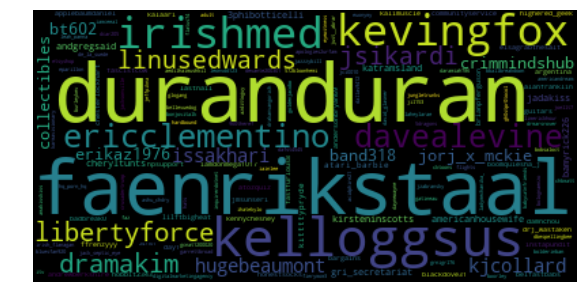

In [327]:
#wordcloud for Trump Cluster

wordcloud = WordCloud(stopwords=stopwords).fit_words(frequencies)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")
plt.show()

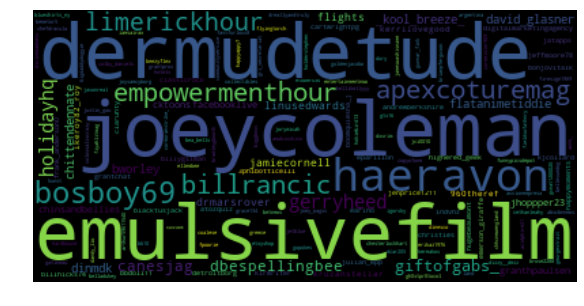

In [328]:
#wordcloud for Clinton Cluster

wordcloud2 = WordCloud().fit_words(clintonfreq)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2, interpolation='bilinear')  
plt.axis("off")
plt.show()


#transpose original matrix 


In [300]:
#
hashmatrix = vectorizer.fit_transform(df_ready_for_sklearn.All_hashtags)
flipmatrix = np.transpose(hashmatrix)
hashtfidf_data = flipmatrix.toarray() 
print(hashtfidf_data)

[[0.         0.         0.00765988 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [301]:
#find kmeans  of k =2 for new flipped matrix, unncessary for 2.1
kmeans = sk_cluster.KMeans(n_clusters=2, max_iter=100, n_init=10)

kmeans_labels = kmeans.fit_predict(hashtfidf_data)

print ('Cluster labels')
print(kmeans_labels)

centroids = kmeans.cluster_centers_
print ('Cluster Centroids')
print(centroids)

error = kmeans.inertia_
print ("The total error of the clustering is: ", error)

Cluster labels
[0 0 0 ... 0 0 0]
Cluster Centroids
[[0.00022051 0.00054182 0.00042709 ... 0.00012198 0.00068988 0.00035107]
 [0.         0.00611715 0.01130557 ... 0.         0.10229766 0.00688843]]
The total error of the clustering is:  4544.944511377652


Text(0, 0.5, 'SSE')

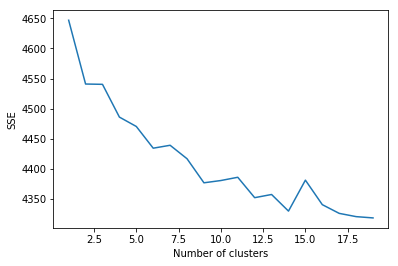

In [304]:
#plot SSE errors of Kmeans Algorithm up to K=20
error = np.zeros(20)
for k in range(1,20):
    kmeans = sk_cluster.KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit_predict(hashtfidf_data)
    error[k] = kmeans.inertia_

plt.plot(range(1, 20), error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [305]:
#sort the centroids
asc_order_centroids = kmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.
des_order_centroids = asc_order_centroids[:,::-1] 

In [306]:
#print top terms for 20 clusters
hashterms = vectorizer.get_feature_names()
print ("All the terms:")
#print(terms, '\n')

for i in range(19):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :30]:
        print (hashterms[ind])

    print()  

All the terms:
Cluster: 0
duranduran
hillaryforva
idiot
isaacdovere
derek_mafs
faenrikstaal
boeufblogginon
anne19brown
boxerbalah
hillarysemail
katrinapierson
carolyng1014
kelloggsus
kevingfox
kattimpf
cathmckenna
hrw
liberalphenom
brynn_jk
irishmed
alivitali
datnofact
historyinpix
johnriverstoo
fieldoffight
ericclementino
leahmcelrath
davealevine
bob_owens
crazylary51

Cluster: 1
jennanjack
emulsivefilm
joeycoleman
dermudetude
davidcorndc
eshalegal
carlreiner
ariberman
kids
haeravon
libyaliberty
don_vito_08
jljefflewis
climatechange
herbieball
bosboy69
huffpostcanada
jennywhojenny
chrisloesch
empowermenthour
barbaraboxer
laurie_david
donvito72
apexcoturemag
leslieodomjr
billrancic
jim_peoples_
cafreeland
cnntonight
drdavidduke

Cluster: 2
adamgoldmannyt
andendall
givingtuesday
afamdemocrats
california
danriehl
liberalssuckx10
alienliterature
detroitborg
fieldyates
jonahnro
blueshirts_ny
jacobbstein
emilymiller
kev371a
coco_wms
hookmeupthursday
chiftatelli
azdittoguy
golfchannel
grammy